**Classification**

**PV Dataset**

In [73]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNTU/Project/PV_Data.xlsx")
data_PV = df.to_numpy()

**Preparing Dataste**

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import metrics
data = data_PV

import matplotlib.pyplot as plt
from sklearn import metrics
data = data_PV



input = data[:, 1:8]
output = data[:,0]
pca = PCA(n_components=7)
pca.fit(input)
input= pca.transform(input)

#Adding normal noise to  input data

#sig = 0.008
#sig = 0.01
#sig = 0.02
#sig = 0.08
#sig = 0.1
#sig = 0.2

#additive_noise = np.random.normal(0, sig, (input.shape[0], input.shape[1]))
#input = input+ input*additive_noise

f = input.shape[1]

def normalizeData(input):
  for ii in range(f):
      input[:, ii] = (input[:, ii] - np.min(input[:, ii])) / (np.max(input[:, ii])-np.min(input[:, ii]))
  return input
input = normalizeData(input)


unique_values = np.unique(output)
value_to_index = {value: idx for idx, value in enumerate(unique_values)}
output= np.eye(len(unique_values))[np.vectorize(value_to_index.get)(output)]

num_data = len(data_PV)
num_train = round(num_data * 0.75)
num_test = num_data - num_train

all_indices = set(range(num_data))
selected = np.random.choice(num_data, size=num_train, replace=False)
non_selected= list(all_indices - set(selected))


input_train = input[selected].astype('float64') 
output_train = output[selected]

input_test = input[non_selected].astype('float64') 
output_test = output[non_selected]


**Initialize Rough**

In [8]:
num_data      = data.shape[0]
percent_train = 0.75
num_train     = round(num_data * percent_train)
num_test      = num_data - num_train

n0, n1, n2 = 7, 28, 10
eta   = 0.03
epoch = 2000

mse_train = np.zeros(epoch)
mse_test  = np.zeros(epoch)

a,c, b = -1.5,0, 1.5


#layer 1 information
np.random.seed(42)
w1u  = np.random.uniform(c, b, (n1, n0))
w1l  = np.random.uniform(a, c, (n1, n0))
net1u = np.zeros(n1)
net1l = np.zeros(n1)
o1u  = np.zeros(n1)
o1l  = np.zeros(n1)
o1   = np.zeros(n1)

#layer 2 information
w2   = np.random.uniform(a, b, (n2, n1))
net2 = np.zeros(n2)
o2   = np.zeros(n2)


def sigmoid(x):
    return (1-np.exp(-x))/(1+np.exp(-x))

def dfsigmoid(x):
    return 2*np.exp(-x)/(1+np.exp(-x))**2

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**Impelemntion Rough**

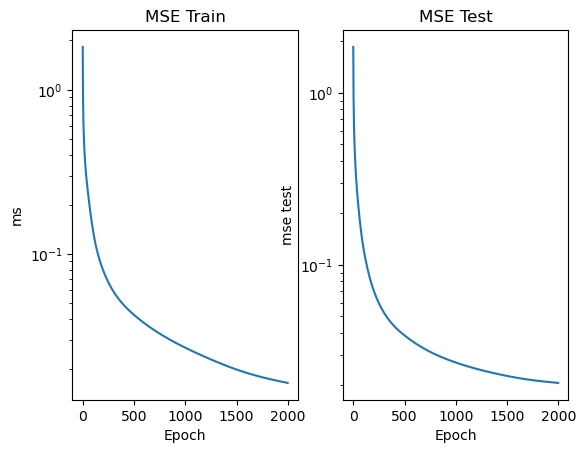

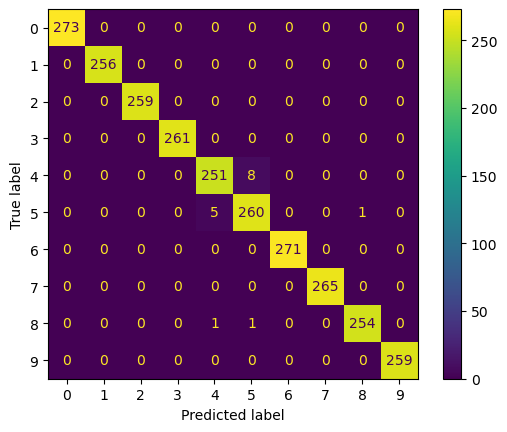

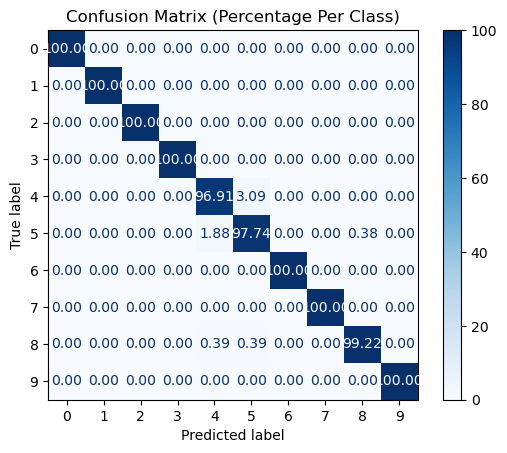

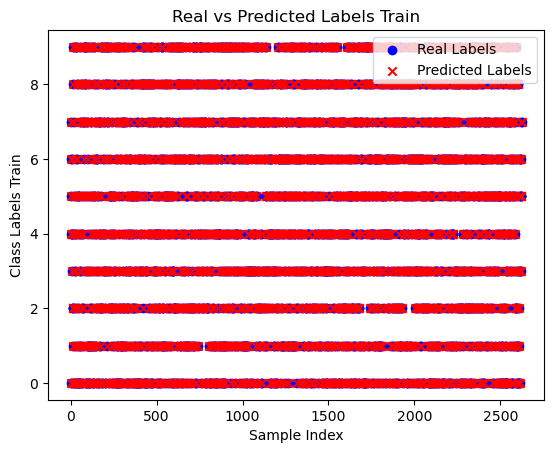

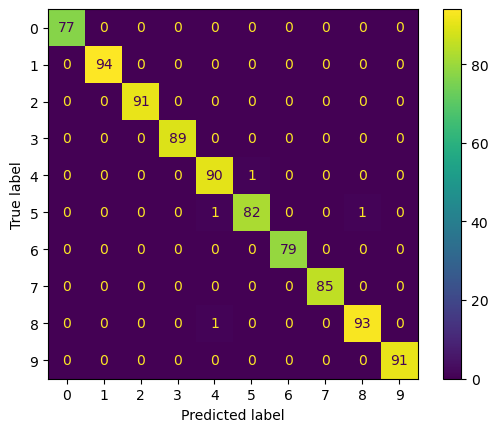

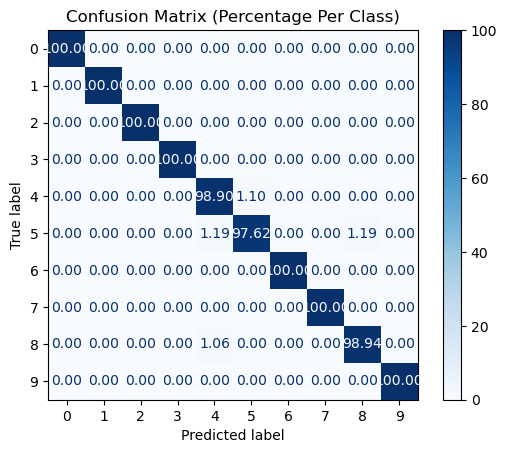

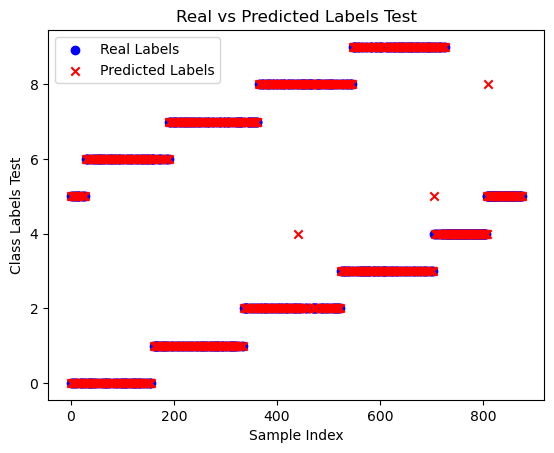

In [11]:
for t in range(epoch):
    error = np.zeros(num_train)
    for i in range(num_train):
        input_data = input_train[i, :] 
        net1u = np.dot(w1u, input_data)
        net1l = np.dot(w1l, input_data)
        o1u   = np.maximum(sigmoid(net1u), sigmoid(net1l))
        o1l   = np.minimum(sigmoid(net1u), sigmoid(net1l))
        o1    = 0.5*o1u + 0.5*o1l
        net2  = np.dot(w2, o1)
        o2    = softmax(net2)
        target = output_train[i, :]
        e = -target*np.log(o2)
        
        gradw2 = -1*np.dot(( target - o2).reshape(n2,1),o1.reshape(1,n1))
        w2 -= eta*gradw2
        
        gradw1u = -0.5*np.dot((np.dot(( target - o2).reshape(1,n2),w2)*dfsigmoid(net1u)).T, input_data.reshape(1, n0))
        w1u -= eta*gradw1u
        
        gradw1l =  -0.5*np.dot((np.dot(( target - o2).reshape(1,n2),w2)*dfsigmoid(net1l)).T, input_data.reshape(1, n0))
        w1l -= eta*gradw1l
        
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train,n2))
    
    for i in range(num_train):
        input_data = input_train[i, :] 
        net1u  = np.dot(w1u, input_data)
        net1l  = np.dot(w1l, input_data)
        o1u    = np.maximum(sigmoid(net1u), sigmoid(net1l))
        o1l    = np.minimum(sigmoid(net1u), sigmoid(net1l))
        o1     = 0.5*o1u + 0.5*o1l
        net2   = np.dot(w2, o1)
        o2     = softmax(net2)
        target = output_train[i, :]
        e = -target*np.log(o2)
        output_data_train[i, :] = o2
        error_square_train[i] = np.sum(e)

    mse_train[t] = np.mean(error_square_train)

    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test,n2))
    
    for i in range(num_test):
        input_data = input_test[i, :] 
        net1u = np.dot(w1u, input_data)
        net1l = np.dot(w1l, input_data)
        o1u   = np.maximum(sigmoid(net1u), sigmoid(net1l))
        o1l   = np.minimum(sigmoid(net1u), sigmoid(net1l))
        o1    = 0.5*o1u + 0.5*o1l
        net2  = np.dot(w2, o1)
        o2    = softmax(net2)
        target = output_test[i, :]
        e = -target*np.log(o2)
        output_data_test[i, :] = o2
        error_square_test[i] = np.sum(e)

    mse_test[t] = np.mean(error_square_test)
    
# MSE train data plot
plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('ms')

# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')

#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2,3,4,5,6,7,8,9])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2,3,4,5,6,7,8,9])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()    

**Initialize MLp**

In [76]:
num_data      = data.shape[0]
percent_train = 0.75
num_train     = round(num_data * percent_train)
num_test      = num_data - num_train

n0, n1, n2 = 7, 28, 10
eta   = 0.03
epoch = 2000

mse_train = np.zeros(epoch)
mse_test  = np.zeros(epoch)

a,b = -1.5, 1.5


#layer 1 information
np.random.seed(42)
w1  = np.random.uniform(a, b, (n1, n0))
net1 = np.zeros(n1)
o1   = np.zeros(n1)

#layer 2 information
w2   = np.random.uniform(a, b, (n2, n1))
net2 = np.zeros(n2)
o2   = np.zeros(n2)


def sigmoid(x):
    return (1-np.exp(-x))/(1+np.exp(-x))

def dfsigmoid(x):
    return 2*np.exp(-x)/(1+np.exp(-x))**2

def softmax(a):
  e = np.exp(a)
  return e/e.sum()

**Implemention MLP**

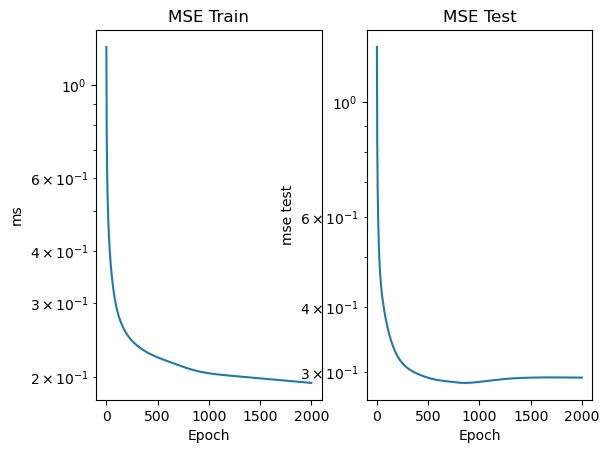

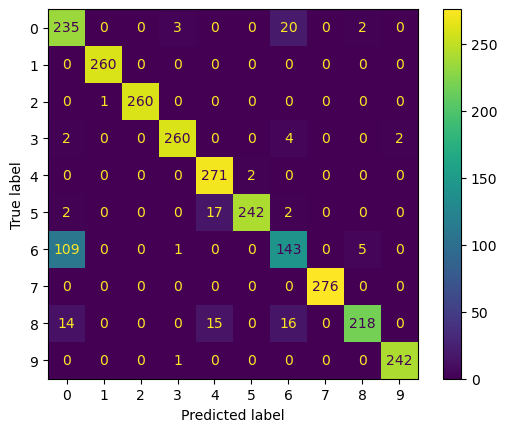

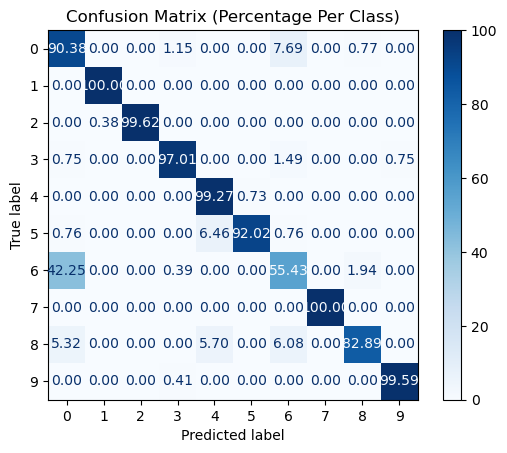

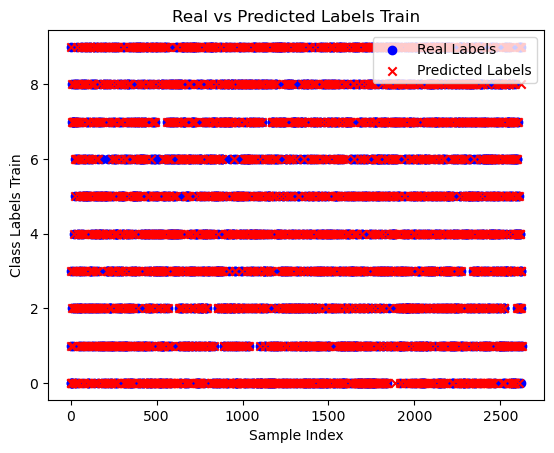

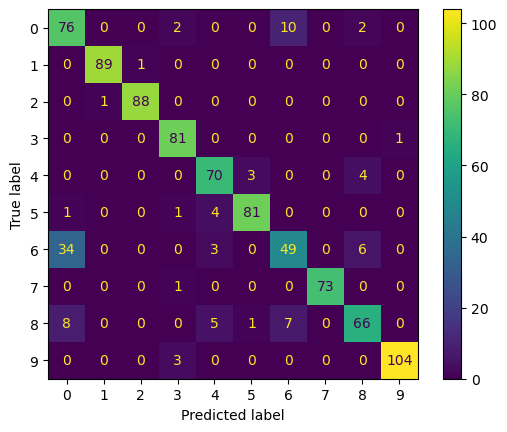

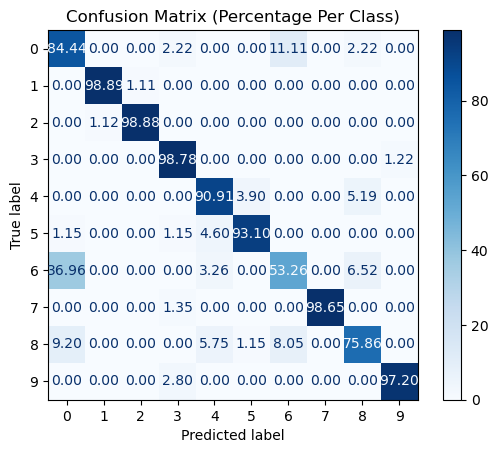

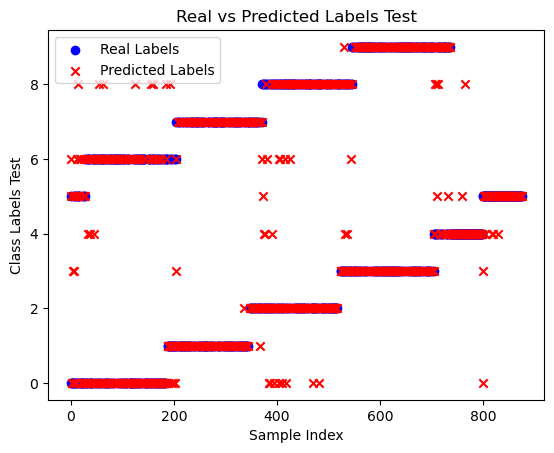

In [79]:
for t in range(epoch):
    error = np.zeros(num_train)
    for i in range(num_train):
        input_data = input_train[i, :] 
        net1   = np.dot(w1, input_data)
        o1     = sigmoid(net1)
        net2   = np.dot(w2, o1)
        o2     = softmax(net2)
        target = output_train[i, :]
        e      = -target*np.log(o2)
        
        gradw2 = -1*np.dot(( target - o2).reshape(n2,1),o1.reshape(1,n1))
        w2 -= eta*gradw2
        
        gradw1 = -1*np.dot((np.dot(( target - o2).reshape(1,n2),w2)*dfsigmoid(net1)).T, input_data.reshape(1, n0))
        w1 -= eta*gradw1

        
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train,n2))
    
    for i in range(num_train):
        input_data = input_train[i, :] 
        net1  = np.dot(w1, input_data)
        o1    = sigmoid(net1)
        net2   = np.dot(w2, o1)
        o2     = softmax(net2)
        target = output_train[i, :]
        e = -target*np.log(o2)
        output_data_train[i, :] = o2
        error_square_train[i] = np.sum(e)

    mse_train[t] = np.mean(error_square_train)

    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test,n2))
    
    for i in range(num_test):
        input_data = input_test[i, :] 
        net1  = np.dot(w1, input_data)
        o1    = sigmoid(net1)
        net2  = np.dot(w2, o1)
        o2    = softmax(net2)
        target = output_test[i, :]
        e = -target*np.log(o2)
        output_data_test[i, :] = o2
        error_square_test[i] = np.sum(e)

    mse_test[t] = np.mean(error_square_test)
    
# MSE train data plot
plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('ms')

# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')

#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2,3,4,5,6,7,8,9])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2,3,4,5,6,7,8,9])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()    

**Initialize RBF**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
# Function to calculate the Gaussian RBF kernel
def rbf_kernel(x, center, sigma):
    net = np.linalg.norm(x - center)
    return np.exp(-net**2 / (2 * sigma**2))

# Function to initialize RBF neuron centers and sigmas
def initialize_parameters(X,num_neurons, number_feature):
    centers = np.zeros((num_neurons, number_feature))
    for i in range(number_feature):
        selected_indices = np.random.choice(X.shape[0], num_neurons, replace=False)
        centers[:, i] = X[selected_indices, i]
    sigma = (X.max() - X.min()) / math.sqrt(2 * num_neurons)
    sigmas = np.ones(num_neurons) * sigma  # Initialize sigmas for each neuron
    return centers, sigmas
    
def softmax(a):
  e = np.exp(a)
  return e/e.sum()
    

n0, n1, n2 = 7, 28, 10
#centers, sigmas = initialize_parameters(input_train,n1, n0)

from sklearn.cluster import KMeans
import numpy as np

np.random.seed(42)

kmeans = KMeans(n_clusters=n1, random_state=42)
kmeans.fit(input)
centers = kmeans.cluster_centers_
sigmas= np.mean(centers, axis=1)

o1 = np.zeros(n1)
w2 = np.random.uniform(-1.5, 1.5, (n2, n1))
o2 = np.zeros(n2)

epoch = 2500
eta  = 0.035
eta2 = 0.035
mse_train = np.zeros(epoch)
mse_test  = np.zeros(epoch)

**Implemention RBF**

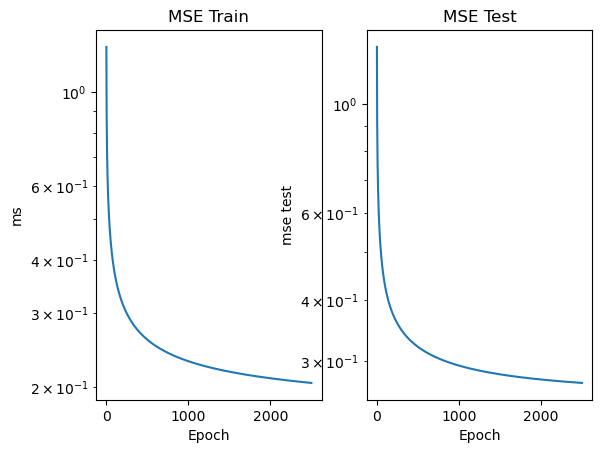

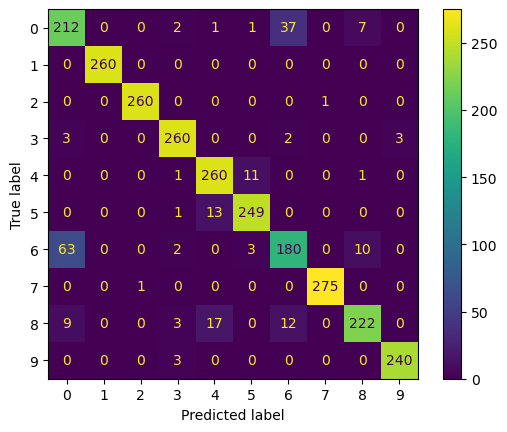

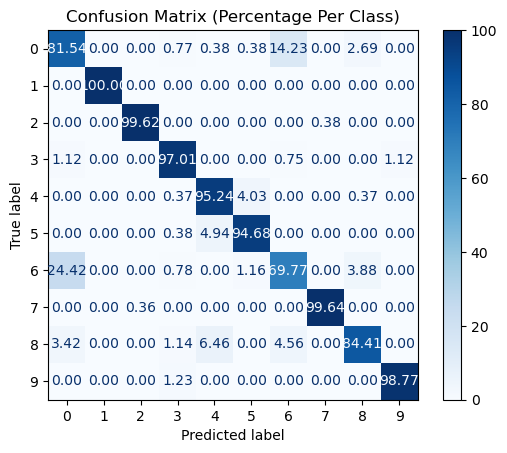

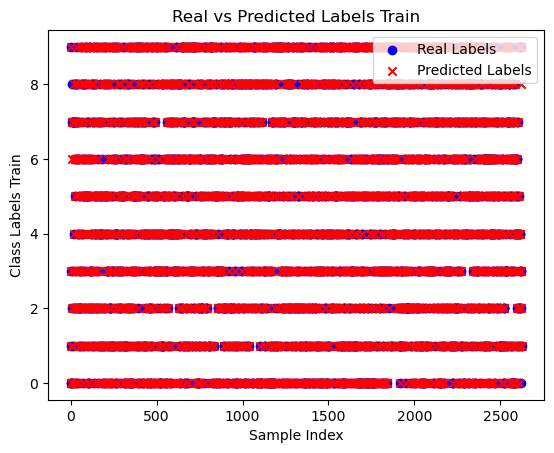

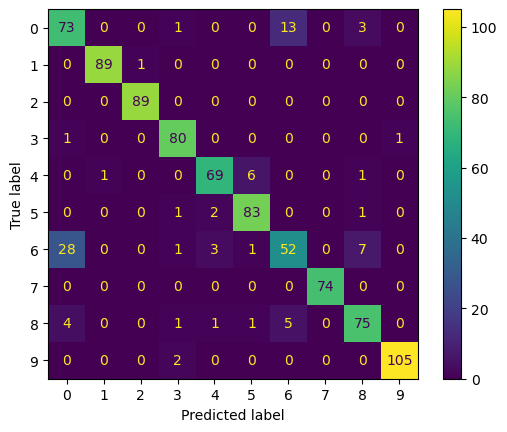

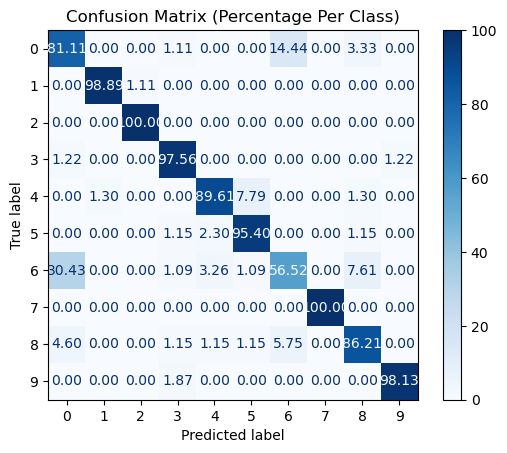

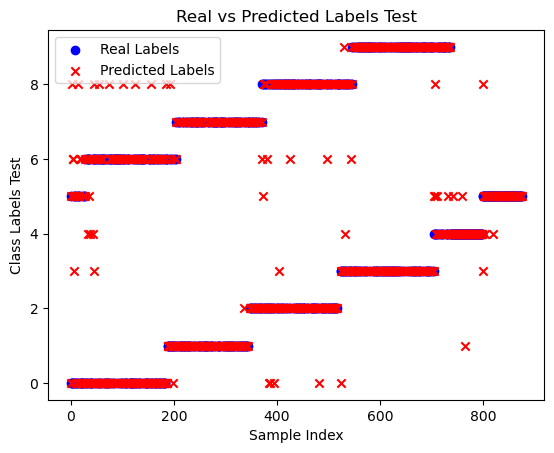

In [20]:
for t in range(epoch):
    e= np.zeros(num_train)
    for i in range(num_train):
        #Feed Forward
        input_data = input_train[i, :] 
        o1 = np.array([rbf_kernel(input_data, c, sigma) for c, sigma in zip(centers, sigmas)])
        net2 = np.dot(w2,o1)
        o2 = softmax(net2)
        target = output_train[i]
        e      = -target*np.log(o2)
        
        #Back Propagations
        #w2
        gradw2 = -1*np.dot((target  -o2).reshape(n2,1),o1.reshape(1,n1))
        w2 -= eta*gradw2

        #Centers and Sigmas 

        for j in range(n1):
            for i in range(n2):
                #gradcenters=(np.dot(np.dot((o2-target).reshape(1,n2),w2),o1.reshape(n1,1)))[0]*((input_data-centers[j])*(1/(sigmas[j]**2)))
                gradcenters = (o2[i]-target[i]).reshape(1,-1).T.dot(np.mean(w2,0).reshape(1,n1)).dot(o1)[0]*((input_data-centers[j])*(1/(sigmas[j]**2)))
                centers[j] += eta2*gradcenters
            
                gradsigmas=(o2[i]-target[i]).reshape(1,-1).T.dot(np.mean(w2,0).reshape(1,n1)).dot(o1)[0]*((np.linalg.norm(input_data-centers[j])**2)*(1/(sigmas[j]**3)))
                sigmas[j] += eta2*gradsigmas

    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train,n2))
    
    for i in range(num_train):
        input_data = input_train[i, :] 
        o1 = np.array([rbf_kernel(input_data, c, sigma) for c, sigma in zip(centers, sigmas)])
        net2 = np.dot(w2,o1)
        o2 = softmax(net2)
        target = output_train[i]
        e      = -target*np.log(o2)
        output_data_train[i, :] = o2
        error_square_train[i] = np.sum(e)

    mse_train[t] = np.mean(error_square_train)

    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test,n2))
    
    for i in range(num_test):
        input_data = input_test[i, :] 
        o1     = np.array([rbf_kernel(input_data, c, sigma) for c, sigma in zip(centers, sigmas)])
        net2   = np.dot(w2,o1)
        o2     = softmax(net2)
        target = output_test[i]
        e      = -target*np.log(o2)
        output_data_test[i, :] = o2
        error_square_test[i] = np.sum(e)

    mse_test[t] = np.mean(error_square_test)
    
# MSE train data plot
plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('ms')

# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')

#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2,3,4,5,6,7,8,9])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2,3,4,5,6,7,8,9])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()    


**Initialize RBF-Rough**

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math
# Function to calculate the Gaussian RBF kernel
def rbf_kernel(x, center, sigma):
    net = np.linalg.norm(x - center)
    return np.exp(-net**2 / (2 * sigma**2))

# Function to initialize RBF neuron centers and sigmas
def initialize_parameters(X,num_neurons, number_feature):
    centers = np.zeros((num_neurons, number_feature))
    for i in range(number_feature):
        selected_indices = np.random.choice(X.shape[0], num_neurons, replace=False)
        centers[:, i] = X[selected_indices, i]
    sigma = (X.max() - X.min()) / math.sqrt(2 * num_neurons)
    sigmas = np.ones(num_neurons) * sigma  # Initialize sigmas for each neuron
    return centers, sigmas
    
def softmax(a):
  e = np.exp(a)
  return e/e.sum()
    

n0, n1, n2 = 7, 28, 10
alpha = 0.5
beta = 0.5

from sklearn.cluster import KMeans
import numpy as np

np.random.seed(42)

kmeans = KMeans(n_clusters=n1, random_state=42)
kmeans.fit(input)
centers = kmeans.cluster_centers_
sigmas= np.mean(centers, axis=1)

centersu = 1.2*centers
centersl = 0.8*centers

o1u = np.zeros(n1)
o1l = np.zeros(n1)
o1 = np.zeros(n1)
w2u = np.random.uniform(-1, 0, (n2, n1))
w2l = np.random.uniform(0, 1, (n2, n1))
w2 = np.random.uniform(-1, 1, (n2, n1))
net1u = np.zeros(n2)
net1l = np.zeros(n2)
o2u = np.zeros(n2)
o2l = np.zeros(n2)
o2 = np.zeros(n2)
net2 = np.zeros(n2
net2u = np.zeros(n2)
net2l = np.zeros(n2)

epoch = 2500
eta  = 0.035
eta2 = 0.035
mse_train = np.zeros(epoch)
mse_test  = np.zeros(epoch)

**Implemention RBF-Rough**

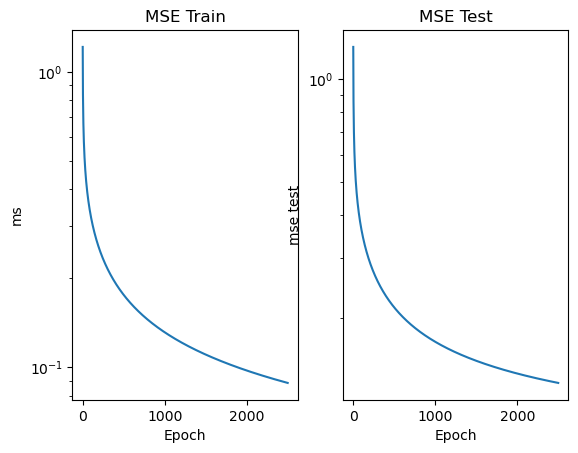

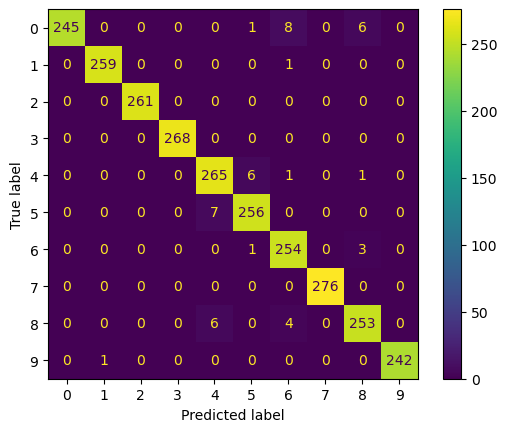

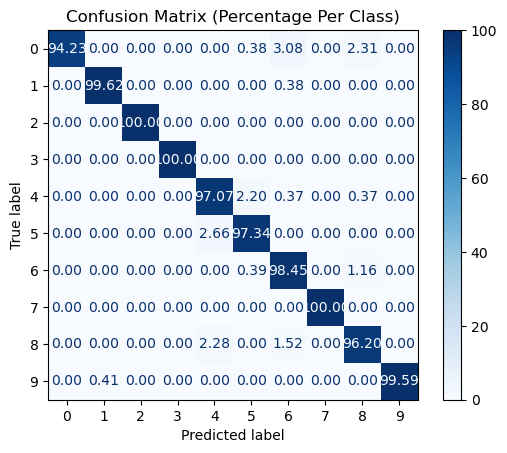

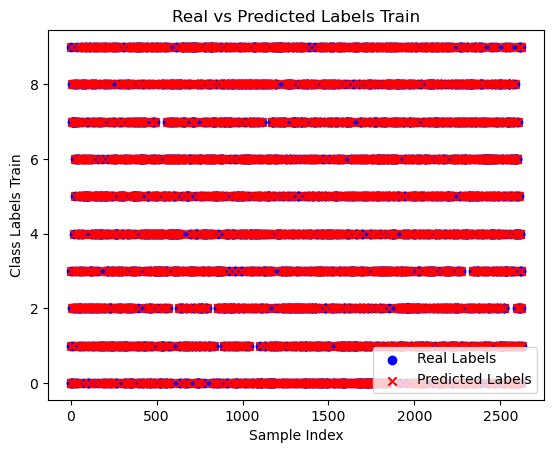

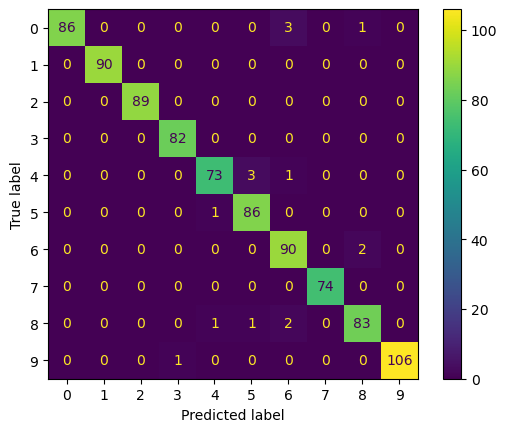

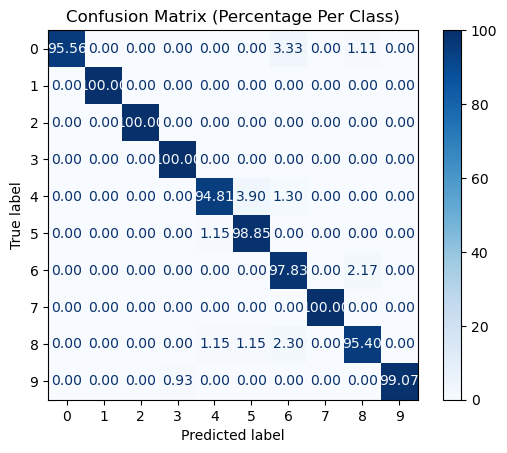

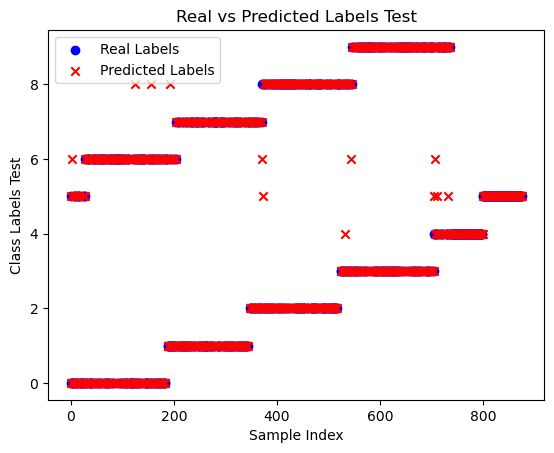

In [46]:
for t in range(epoch):
    error = np.zeros(n2)
    for i in range(num_train):
        #Feed Forward
        input_data = input_train[i, :] 
        o11 = np.array([rbf_kernel(input_data, c, sigma) for c, sigma in zip(centersu, sigmas)])
        o12 = np.array([rbf_kernel(input_data, c, sigma) for c, sigma in zip(centersl, sigmas)])
        o1u = np.maximum(o11, o12)
        o1l = np.minimum(o11, o12)
        o1  = 0.5*o1l + 0.5*o1u
        net2u = np.dot(w2u,o1)
        net2l = np.dot(w2l, o1)
        net2 = 0.5*net2u + 0.5*net2l
        o2 = softmax(net2)
        target = output_train[i]
        e      = -target*np.log(o2)
        
        gradw2 = -0.5*np.dot((target  -o2).reshape(n2,1),o1.reshape(1,n1))
        w2u -= eta*gradw2
        w2l -= eta*gradw2
        for j in range(n1):
            for ii in range(n2):
                centersu[j] += 0.5*eta*(o2[ii]-target[ii]).reshape(-1,1).T.dot((0.5*np.mean(w2u,0) + 0.5*np.mean(w2l)).reshape(1,n1)).dot(o1u)[0] * (input_data-centersu[j]) * (1/(sigmas[j]**2)) 
                centersl[j] += 0.5*eta*(o2[ii]-target[ii]).reshape(-1,1).T.dot((0.5*np.mean(w2u,0) + 0.5*np.mean(w2l)).reshape(1,n1)).dot(o1l)[0] * (input_data-centersl[j]) * (1/(sigmas[j]**2)) 
                sigmas[j]   += eta*(o2[ii] - target[ii]).reshape(-1,1).T.dot((0.5*np.mean(w2u,0) + 0.5*np.mean(w2l)).reshape(1,n1)).dot(o1l)[0]*(np.linalg.norm(input_data-centersl[j])**2)*(1/(sigmas[j]**3)) + eta*(o2[ii] - target[ii]).reshape(-1,1).T.dot((0.5*np.mean(w2u,0) + 0.5*np.mean(w2l)).reshape(1,n1)).dot(o1u)[0]*(np.linalg.norm(input_data-centersu[j])**2)*(1/(sigmas[j]**3))
    
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros((num_train,n2))
    for i in range(num_train):
        input_data = input_train[i, :] 
        o11 = np.array([rbf_kernel(input_data, c, sigma) for c, sigma in zip(centersu, sigmas)])
        o12 = np.array([rbf_kernel(input_data, c, sigma) for c, sigma in zip(centersl, sigmas)])
        o1u = np.maximum(o11, o12)
        o1l = np.minimum(o11, o12)
        o1  = 0.5*o1l + 0.5*o1u
        net2u = np.dot(w2u,o1)
        net2l = np.dot(w2l, o1)
        net2 = 0.5*net2u + 0.5*net2l
        o2 = softmax(net2) 
        target = output_train[i]
        e      = -target*np.log(o2)
        output_data_train[i] = o2
        error_square_train[i] = np.sum(e)
    mse_train[t] = np.mean(error_square_train)


    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros((num_test,n2))
    for i in range(num_test):
        input_data = input_test[i, :] 
        o11 = np.array([rbf_kernel(input_data, c, sigma) for c, sigma in zip(centersu, sigmas)])
        o12 = np.array([rbf_kernel(input_data, c, sigma) for c, sigma in zip(centersl, sigmas)])
        o1u = np.maximum(o11, o12)
        o1l = np.minimum(o11, o12)
        o1  = 0.5*o1l + 0.5*o1u
        net2u = np.dot(w2u,o1)
        net2l = np.dot(w2l, o1)
        net2 = 0.5*net2u + 0.5*net2l
        o2 = softmax(net2)
        target = output_test[i]
        e      = -target*np.log(o2)
        output_data_test[i] = o2
        error_square_test[i] = np.sum(e)
    mse_test[t] = np.mean(error_square_test)

# MSE train data plot
plt.subplot(1, 2, 1)
plt.cla()
plt.semilogy(mse_train)
plt.title('MSE Train')
plt.xlabel('Epoch')
plt.ylabel('ms')

# MSE test data plot
plt.subplot(1, 2, 2)
plt.cla()
plt.semilogy(mse_test)
plt.title('MSE Test')
plt.xlabel('Epoch')
plt.ylabel('mse test')

#plot confusion matrix for train data
actual =np.argmax(output_train, 1)
predicted = np.argmax(output_data_train, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Train")
plt.title("Real vs Predicted Labels Train")
plt.legend()
plt.show()

#plot confusion matrix for test data
actual =np.argmax(output_test, 1)
predicted = np.argmax(output_data_test, 1)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])
cm_display.plot()
plt.show()
confusion_matrix_per_class = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1, keepdims=True) * 100
cm_display_per_class = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_per_class,display_labels=[0,1,2])
cm_display_per_class.plot(cmap="Blues", values_format=".2f")
plt.title("Confusion Matrix (Percentage Per Class)")
plt.show()

sample_indices = np.arange(len(actual))  
plt.scatter(sample_indices, actual, color="blue", label="Real Labels", marker="o")

plt.scatter(sample_indices, predicted, color="red", label="Predicted Labels", marker="x")

plt.xlabel("Sample Index")
plt.ylabel("Class Labels Test")
plt.title("Real vs Predicted Labels Test")
plt.legend()
plt.show()    
